In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [2]:
uploaded = files.upload()

Saving True.csv to True.csv


In [ ]:
#constants.
real_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_data = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
#libraries.
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

We have two datasets, One for fake news, and the ather is real ones.

In [6]:
real =pd.read_csv("True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


We have 21417 entries in the real news dataset and we ***have no missingness***.
<br> Let's display Fake news dataset.

In [5]:
fake =pd.read_csv("Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


We have 23481 entries, One row per each fake news that has been detected.<br> And it seems we do not have any missingness in fake news dataset.

date column in both real and fake news datasets is in object, we need to convert it inot datetime.

Let's ***combine our two datasets into one***, but first let's add a ***new column for both of them to refer withered it's real or not***.

In [9]:
real['label'] = "Real"
fake['label'] = "Fake"

In [12]:
data = pd.concat([real, fake], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


### ***Exploratory data analysis***.

In [13]:
FR_subjects= pd.DataFrame(data.groupby(by="label").subject.value_counts(normalize=True)*100)
round(FR_subjects,1)

subject
label subject                 
Fake  News                38.5
      politics            29.1
      left-news           19.0
      Government News      6.7
      US_News              3.3
      Middle-east          3.3
Real  politicsNews        52.6
      worldnews           47.4

For better intuition, let's convert this table into a nicer looking chart.<br><br>But first, Let's set a global style for our visualizations.

In [14]:
sns.set(font_scale=1.5, rc={"figure.figsize":(8,6)})
sns.set_style("ticks")

In [15]:
count = data["label"].value_counts()
subject= fake["subject"].value_counts()

In [16]:
from matplotlib.patches import ConnectionPatch

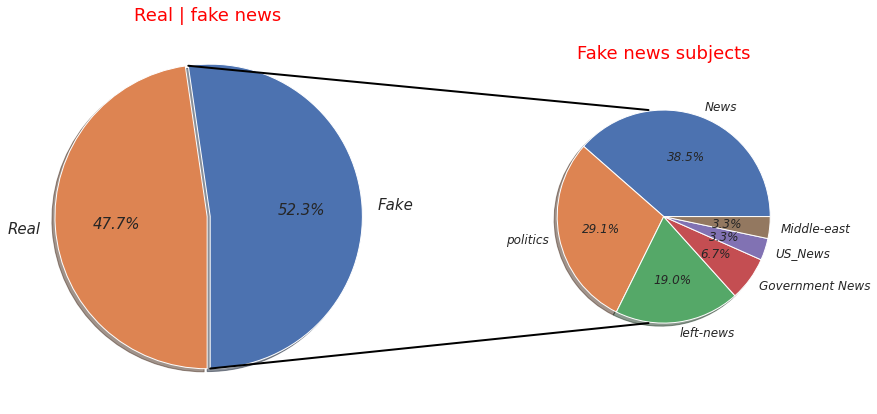

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.pie(count, labels = count.index, autopct='%1.1f%%', startangle=-90, 
        explode = [0.02, 0], textprops={"fontsize":15, "style":"italic"}, shadow=True)

ax2.pie(subject, labels= subject.index, autopct='%1.1f%%', radius=0.7, 
        textprops={"fontsize":12, "style":"italic"}, shadow=True)

ax1.set_title('Real | fake news', color="red")
ax2.set_title('Fake news subjects', color="red", y=0.9)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2, center, r = ax1.patches[0].theta1, ax1.patches[0].theta2, ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
width=0.2

con = ConnectionPatch(xyA=(- width / 2, .7), xyB=(x, y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.7), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

Anther way to visualize this table.

In [20]:
def display_percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /3.5
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), weight="bold", size = 12, color="black")
    sns.despine(top=True, left=True, right=True, bottom=True)
    plt.xticks(rotation=90)

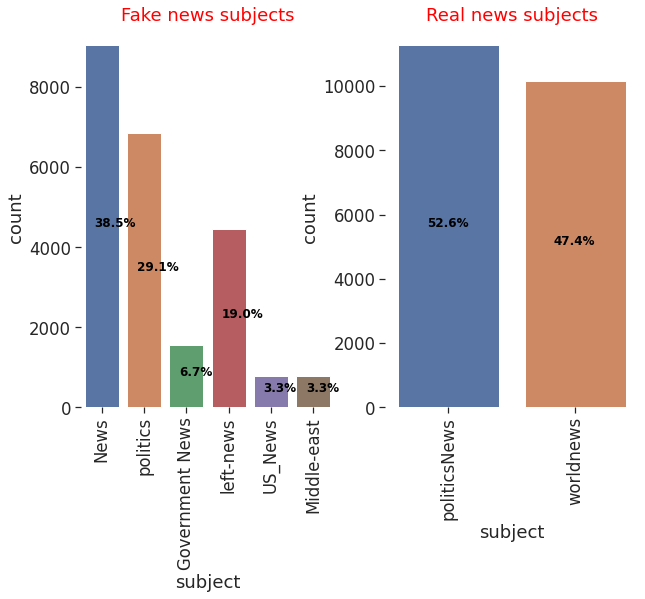

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
ax= sns.countplot(data=fake, x="subject")
display_percentage(ax, fake.subject)
plt.title("Fake news subjects", color="red")

plt.subplot(1,2,2)
ax= sns.countplot(data=real, x="subject")
display_percentage(ax, real.subject)
plt.title("Real news subjects", color="red")

plt.show()

Subjects are not well distributed The real data contains only two subjects and the fake data contains the remaining subjects. Only Politics are common.
So, the question is, does this description follow their titles? Otherwise we can say that any news we get about the US or the Middle East is completely fake. Does it make sense?

As we observed, date is in object, wich is not suitable. So, Let's convert in into a datetime. to get a better intution about the rates of our real and fake news.

In [22]:
real['date'] =  pd.to_datetime(real['date'], errors ='coerce')

In [23]:
real_news_date= pd.DataFrame(real.groupby("date").count())

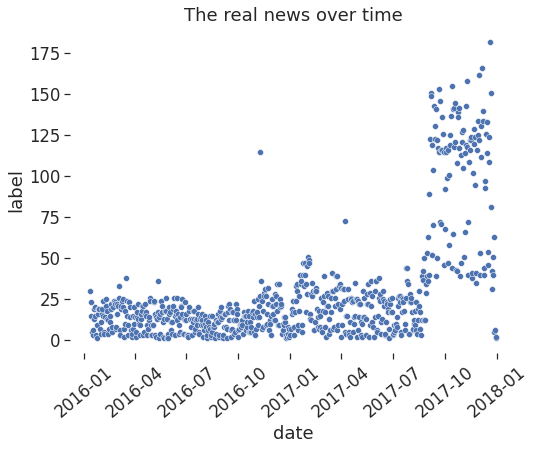

In [25]:
sns.scatterplot(data=real_news_date, x=real_news_date.index, y="label")
plt.xticks(rotation=40)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("The real news over time")
plt.show()

### ***Text pre-processing***
We need to perform two steps ***to make this dataset suitable for machine learning***.
<br> Our target is to **standardize the text**. We'll be covering the common ones. This involves steps like ***converting words to lowercase, removing unnecessary whitespace, removing punctuation, removing commonly occurring words or stopwords***, expanding contracted words like don't and ***removing special characters such as numbers and emojis***, and getting the base form of words. For instance, 'Reduction' gets converted to its base form, which is reduce. 

In [26]:
import re

In [27]:
def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [28]:
data['text'] = data.text.apply(lambda x : clean_train_data(x))
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",Real


#### ***Remove english stopwords***.
There are ***some words in the English language that occur so commonly and does not contain any useful information***. So, it's often a ***good idea to ignore them***, as they could skew our analysis and may negatively affect the machine learning model performance.
Examples include articles such as a and the, ***be verbs*** such as am, is and are and pronouns such as he and she. 

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [ ]:
data['text'] = data.text.apply(lambda x : remove_eng_stopwords(x))
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


#### ***Find out common words***.

In [33]:
from itertools import chain
from collections import Counter

In [ ]:
list_words = data['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

,index,count
0,said,130051
1,trump,115869
2,us,63100
3,would,54929
4,president,51005


Let's visualize this table into a nicer looking chart.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

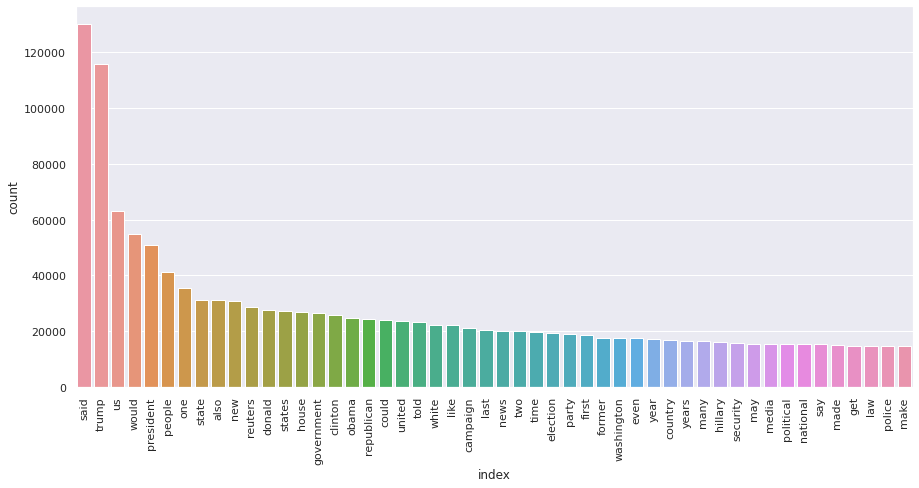

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
lemm = WordNetLemmatizer()

In [ ]:
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [ ]:
data['text'] = data.text.apply(lambda x : word_lemmatizer(x))
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


### N-Gram Analysis.
<center><img style="width: 700px;" src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png"></center>

In [ ]:
string = ' '.join(data['text'])

In [ ]:
str_val = string.split(" ")

### Unigram Analysis

In [ ]:
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]

In [ ]:
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()

,key,value
0,"(said,)",130051
1,"(trump,)",127942
2,"(u,)",63394
3,"(state,)",58301
4,"(would,)",54929


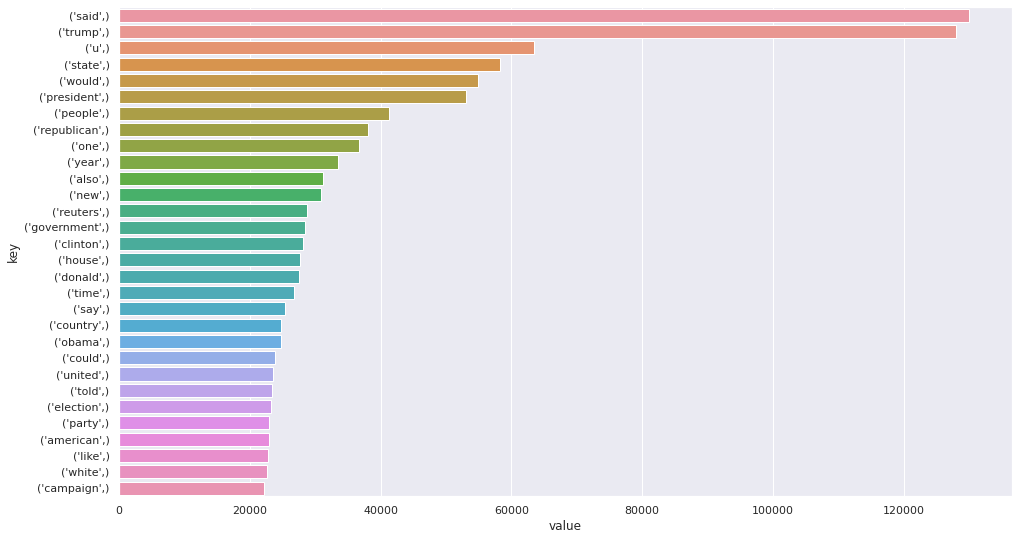

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

### Bigram Analysis

In [ ]:
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]

In [ ]:
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})
data_bigram_df.head()

,key,value
0,"(donald, trump)",23216
1,"(united, state)",18368
2,"(white, house)",14672
3,"(hillary, clinton)",9177
4,"(new, york)",8624


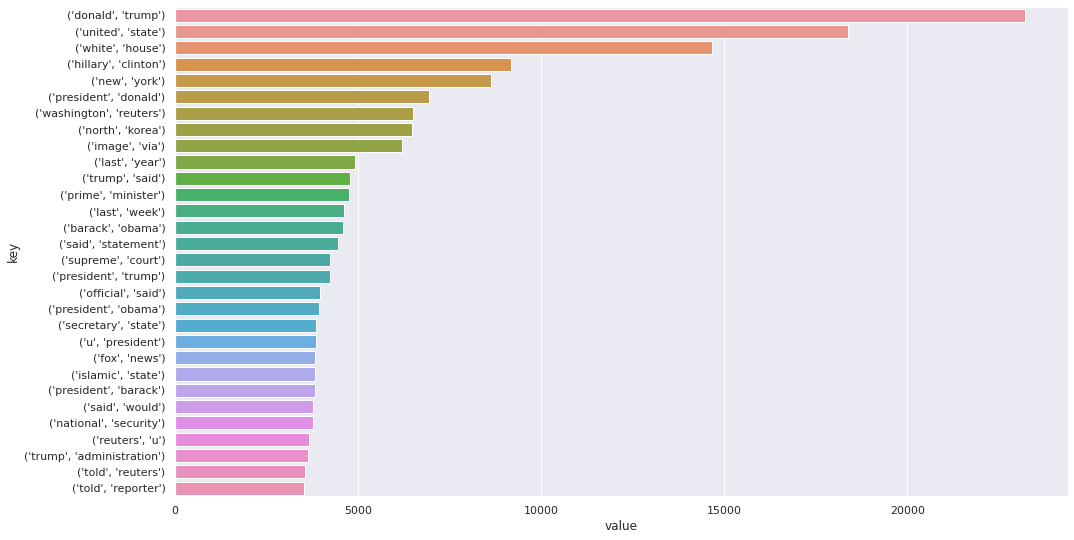

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)

### Trigram Analysis

In [ ]:
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]

In [ ]:
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})
data_trigram_df.head()

,key,value
0,"(president, donald, trump)",6732
1,"(president, barack, obama)",2854
2,"(u, president, donald)",2590
3,"(washington, reuters, u)",2358
4,"(donald, j, trump)",2146


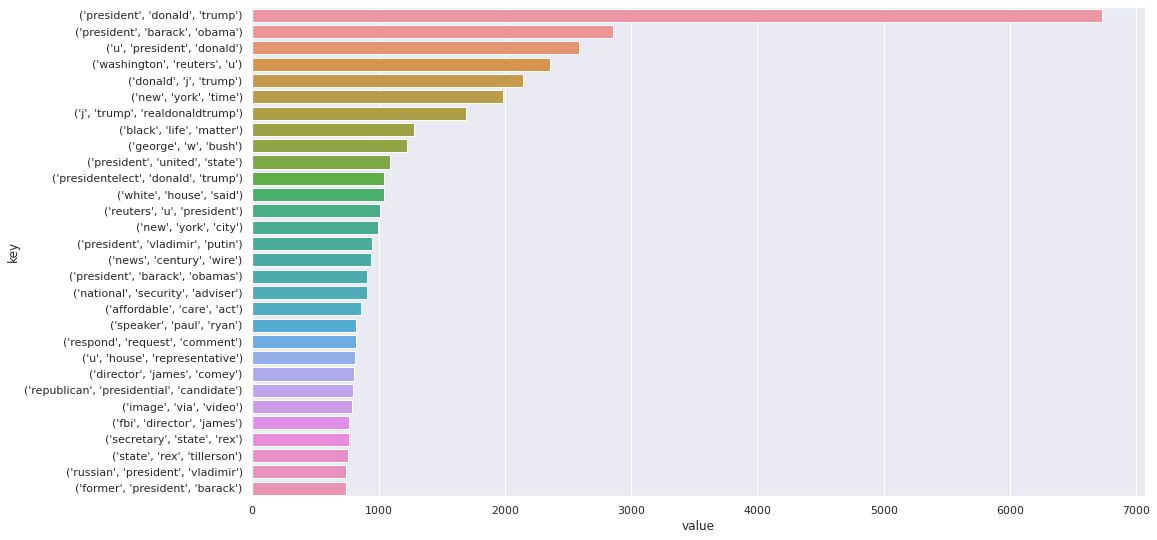

In [ ]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)

#### Wow they incredibly use Donald Trump too many times. What u think is this ok?

### **Building a machine learning model to classify fake news**.

In [ ]:
model_data = data.copy()

In [ ]:
model_data['combine_text'] = model_data['subject'] + " " + model_data['title'] + " " + model_data['text']
del model_data['title']
del model_data['subject']
del model_data['date']
del model_data['text']
model_data.head()

,target,combine_text
0,1,"politicsNews As U.S. budget fight looms, Repub..."
1,1,politicsNews U.S. military to accept transgend...
2,1,politicsNews Senior U.S. Republican senator: '...
3,1,politicsNews FBI Russia probe helped by Austra...
4,1,politicsNews Trump wants Postal Service to cha...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(model_data['combine_text'], model_data['target'], random_state=0)

### Bag of Words
<center><img style="width: 700px;" src="https://3.bp.blogspot.com/-4pxORQAgAFI/XMNZhEssXtI/AAAAAAAAGmA/SuQGsp-GyT4jKlUZieg_A5lnTza_GujfwCLcBGAs/s1600/bag_of_words.png"></center>

## Vectorizing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)

In [ ]:
X_vec_test = vec_train.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_vec_train, y_train)

LogisticRegression()

#### ***Model evalution***.
##### Confusion matrix
To further evaluate our model, we can check the confusion matrix which shows correct and incorrect predicted labels. It's a bit easier to read, as the first value and last value of the matrix, ***or the main diagonal of the matrix*** show true scores, which  means the true classification of both Real of fake news. In a confusion matrix, the predicted labels are shown across the top and the true labels are shown down the side.
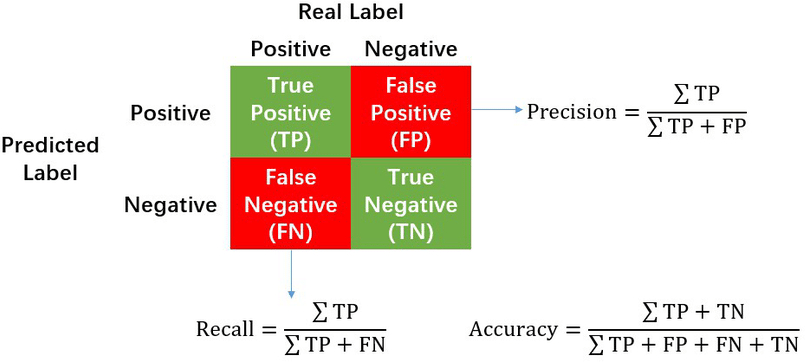


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
predicted_value = model.predict(X_vec_test)

In [ ]:
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9985562606683752


this result it is 99.86 means this title is almost real. but actually is it? u might be found somethings wrong in model execution. ok lets do some in modeling to do more reliable. 

### Modeling -2

In [ ]:
model_2_data = lemmatize_data.copy()
model_2_data['combine_text'] = model_2_data['title'] + " " + model_2_data['text']
del model_2_data['title']
del model_2_data['subject']
del model_2_data['date']
del model_2_data['text']
model_2_data.head()

,target,combine_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(model_2_data['combine_text'], model_2_data['target'], test_size=0.33, random_state=0)

In [ ]:
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [ ]:
print(accuracy_value)

0.9966511018602802


In [ ]:
model = LogisticRegression()
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### so our new predicted result is 99.66, not much difference from previous one. though im not doing much work in modeling. but i can assure you this dataset always given u above 90% accuracy.

### why this is. is it really easy to find out which news are fake and which are real. i don't know. but i want to show u something about this dataset. 

### Deep drive in this Dataset

## Fact-2: Text Length

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each text')

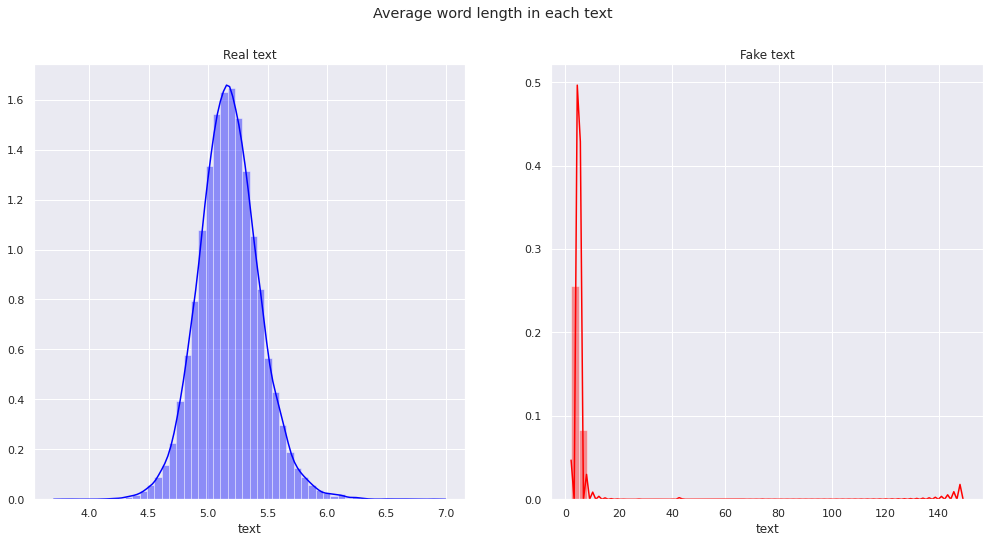

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,8))

word = ex_combine_data[ex_combine_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Real text')

word = ex_combine_data[ex_combine_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')

fig.suptitle('Average word length in each text')

#### Average text length are not same for both. And the difference are really remarkable. Yes length can not be same but this difference is huge. Maybe it can be hamper some training model.

## Fact-3: Unique Words

In [ ]:
all_words_after = real_data['text'].str.split()
merged = list(chain(*all_words_after))
d = Counter(merged)
df = pd.DataFrame(data=d, index=['count'])
top_count_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_count_words.head()

,index,count
0,the,422622
1,to,243787
2,of,204339
3,a,187214
4,and,179411


In [ ]:
from collections import Counter
results = Counter()
real_data['text'].str.lower().str.split().apply(results.update)
real_unq_count = len(results)
print(real_unq_count)

163084


In [ ]:
results = Counter()
fake_data['text'].str.lower().str.split().apply(results.update)
fake_unq_count = len(results)
print(fake_unq_count)

267271


#### Earlier we saw that the average text length of fake information is not very long, but in unique words it appears higher than the real data. That's mean, the ratio of same words is too much. What Do you think is this okay for prediction?